<a href="https://colab.research.google.com/github/Gaurangg1404/learning-AI-ML/blob/main/CVday1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-02-03 20:36:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   231MB/s    in 0.5s    

2024-02-03 20:36:23 (231 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb  3 20:36 .
drwxr-xr-x 1 root root 4096 Feb  3 20:36 ..
drwxr-xr-x 4 root root 4096 Feb  3 20:36 test
drwxr-xr-x 4 root root 4096 Feb  3 20:36 train


In [8]:
num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_image_train

750

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")
  return img


['2432061.jpg']
Image shape : (384, 512, 3)


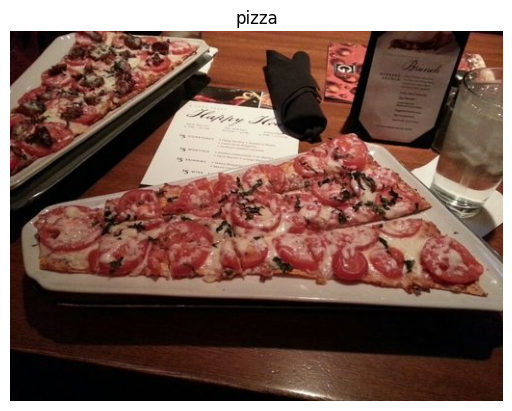

In [11]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[17,  2,  5],
        [16,  1,  4],
        [16,  1,  4],
        ...,
        [ 8,  6, 11],
        [ 7,  6, 12],
        [ 7,  6, 12]],

       [[17,  2,  5],
        [16,  1,  4],
        [16,  1,  4],
        ...,
        [14,  8, 12],
        [15,  8, 15],
        [14,  9, 15]],

       [[14,  2,  4],
        [13,  1,  3],
        [13,  1,  3],
        ...,
        [19,  3,  4],
        [21,  5,  8],
        [20,  5,  8]],

       ...,

       [[ 0,  1,  3],
        [ 0,  1,  3],
        [ 1,  2,  4],
        ...,
        [52, 23, 15],
        [53, 24, 18],
        [52, 23, 17]],

       [[ 1,  2,  4],
        [ 1,  2,  4],
        [ 1,  2,  4],
        ...,
        [50, 21, 13],
        [50, 21, 15],
        [47, 18, 12]],

       [[ 2,  3,  5],
        [ 2,  3,  5],
        [ 1,  2,  4],
        ...,
        [46, 17,  9],
        [43, 14,  8],
        [39, 10,  4]]], dtype=uint8)>

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 230ms/step - loss: 0.5998 - accuracy: 0.6800 - val_loss: 0.4810 - val_accuracy: 0.7653
Epoch 2/5
47/47 [==============================] - 8s 166ms/step - loss: 0.4505 - accuracy: 0.8073 - val_loss: 0.4221 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 225ms/step - loss: 0.3990 - accuracy: 0.8247 - val_loss: 0.3510 - val_accuracy: 0.8513
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3586 - accuracy: 0.8527 - val_loss: 0.2946 - val_accuracy: 0.8807
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3298 - accuracy: 0.8593 - val_loss: 0.3034 - val_accuracy: 0.8733


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [15]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 172ms/step - loss: 0.7470 - accuracy: 0.4873 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 157ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 175ms/step - loss: 1.4292 - accuracy: 0.6680 - val_loss: 0.9527 - val_accuracy: 0.5760
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.7511 - accuracy: 0.7313 - val_loss: 1.2505 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7243 - accuracy: 0.7373 - val_loss: 0.5220 - val_accuracy: 0.7667
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6372 - accuracy: 0.7300 - val_loss: 0.4436 - val_accuracy: 0.8227
Epoch 5/5
47/47 [==============================] - 8s 161ms/step - loss: 0.5882 - accuracy: 0.7613 - val_loss: 0.4548 - val_accuracy: 0.7987


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


['3470083.jpg']
Image shape : (384, 512, 3)
['2965.jpg']
Image shape : (512, 384, 3)


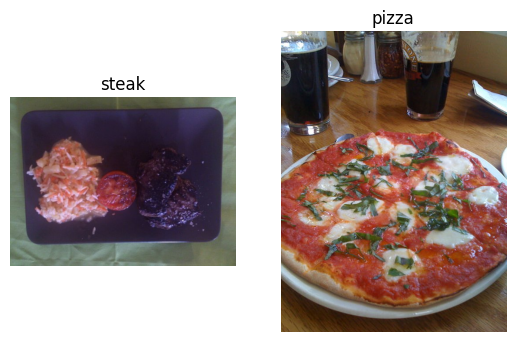

In [19]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [20]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


In [21]:
!nvidia-smi

Sat Feb  3 20:39:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [26]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(224,224),
                                          class_mode="binary",
                                          batch_size=32)

test_data= test_datagen.flow_from_directory(test_dir,
                                       target_size=(224,224),
                                       class_mode="binary",
                                       batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [28]:
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.7411765 , 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.75294125, 0.5529412 , 0.34509805],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7607844 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.3019608 ],
          [0.78823537, 0.5372549 , 0.29411766]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")


])

In [31]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 150ms/step - loss: 0.7429 - accuracy: 0.6347 - val_loss: 0.4697 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4326 - accuracy: 0.7967 - val_loss: 0.3941 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3355 - accuracy: 0.8580 - val_loss: 0.5955 - val_accuracy: 0.6680
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.2651 - accuracy: 0.9067 - val_loss: 0.4214 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.0925 - accuracy: 0.9733 - val_loss: 0.5035 - val_accuracy: 0.8040


16/16 [==============================] - 2s 134ms/step - loss: 0.3761 - accuracy: 0.8240


[0.37612366676330566, 0.8240000009536743]

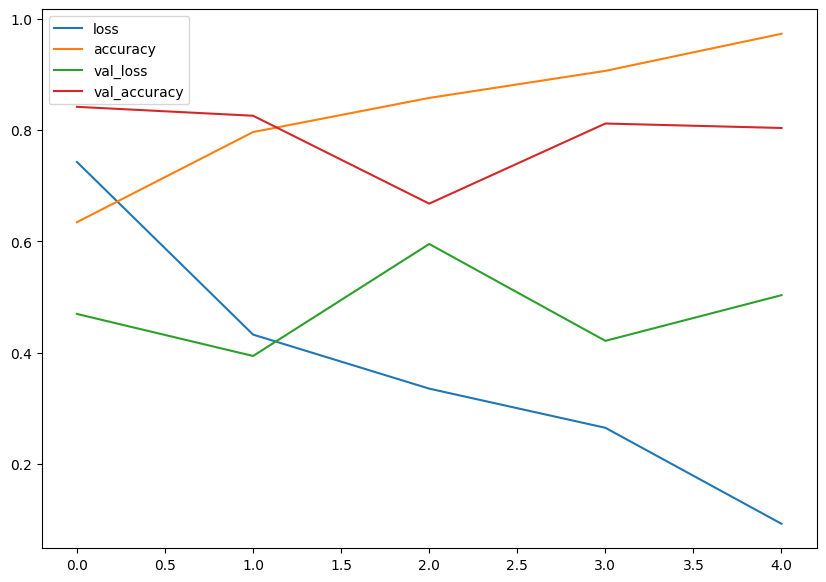

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [38]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs= range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

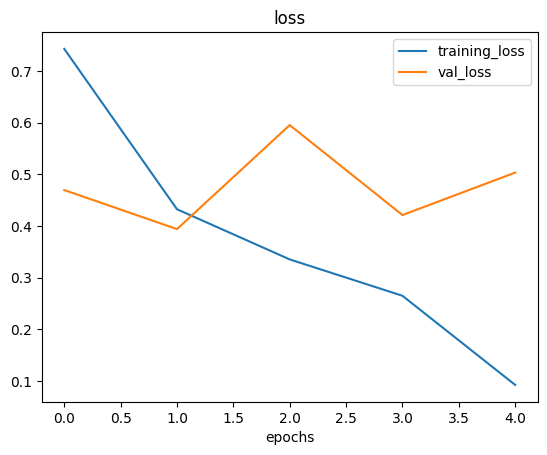

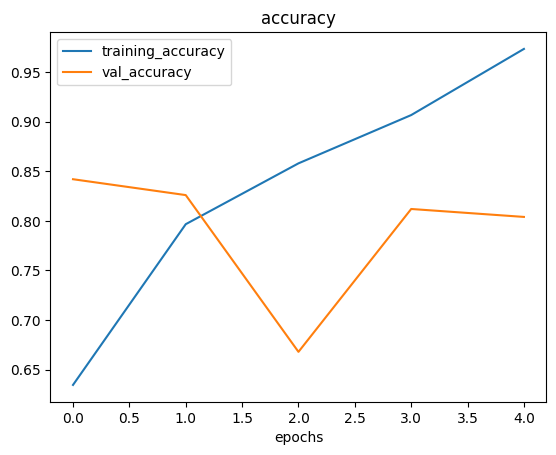

In [39]:
plot_loss_curves(history_4)

In [41]:
model_5=Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

In [42]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [43]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.6069 - accuracy: 0.6733

47/47 [==============================] - 9s 135ms/step - loss: 0.6069 - accuracy: 0.6733 - val_loss: 0.4906 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 4s 86ms/step - loss: 0.4798 - accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4241 - accuracy: 0.8147
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3777 - accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3726 - accuracy: 0.8460


In [44]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

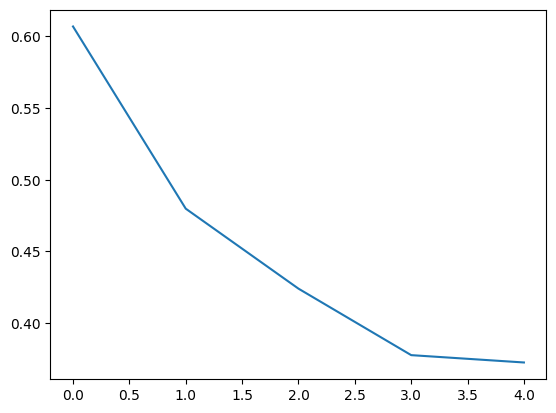

In [45]:
plot_loss_curves(history_5)

In [46]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen = ImageDataGenerator(rescale=1/255.)

